In [1]:
#getting required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#getting data

from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()

#converting to pandas dataframe

cali_df = pd.DataFrame(cali_data.data, columns = cali_data.feature_names)

In [2]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


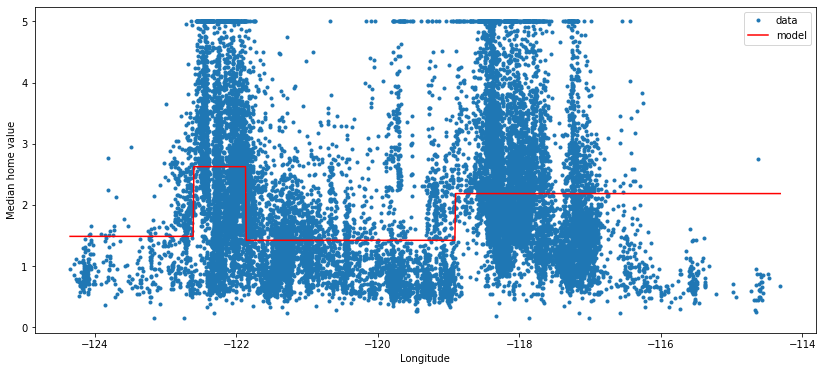

In [6]:
from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=2)
model.fit(cali_df['Longitude'].to_frame(), cali_data.target)


plt.figure( figsize= [14,6])
plt.plot(cali_df['Longitude'], cali_data.target, '.', label='data')
plt.plot(cali_df['Longitude'].sort_values(), 
         model.predict(cali_df['Longitude'].sort_values().to_frame()), 
         'r-', label='model')

plt.xlabel('Longitude')
plt.ylabel('Median home value')
plt.legend()

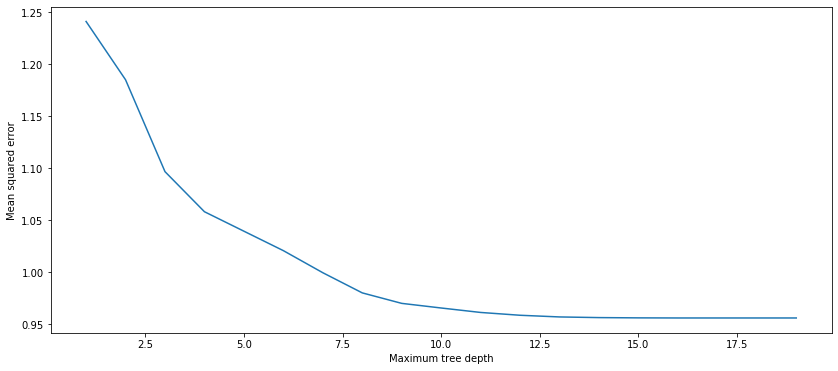

In [8]:
from sklearn.metrics import mean_squared_error as mse

max_depths = range(1, 20)
training_error = []
for max_depth in max_depths:
    model = tree.DecisionTreeRegressor(max_depth=max_depth)
    model.fit(cali_df['Latitude'].to_frame(), cali_data.target)
    training_error.append(mse(cali_data.target, model.predict(cali_df['Latitude'].to_frame())))

plt.figure( figsize= [14,6])
plt.plot(max_depths, training_error)
plt.xlabel('Maximum tree depth')
plt.ylabel('Mean squared error');

In [9]:
#since the model performs better ( overfits) the data on training, it might not perform that well on 
#the test data. Hence a need to split the data into train and test

In [11]:
#using split

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

X_train, X_test, y_train, y_test = train_test_split(*shuffle(cali_df['Longitude'].to_frame(), cali_data.target), test_size=0.1)


In [14]:
#making the model

testing_error = []

for max_depth in max_depths:
    
    model = tree.DecisionTreeRegressor( max_depth = max_depth)

    model.fit(X_train, y_train)

    testing_error.append(mse(y_test, model.predict(X_test)))

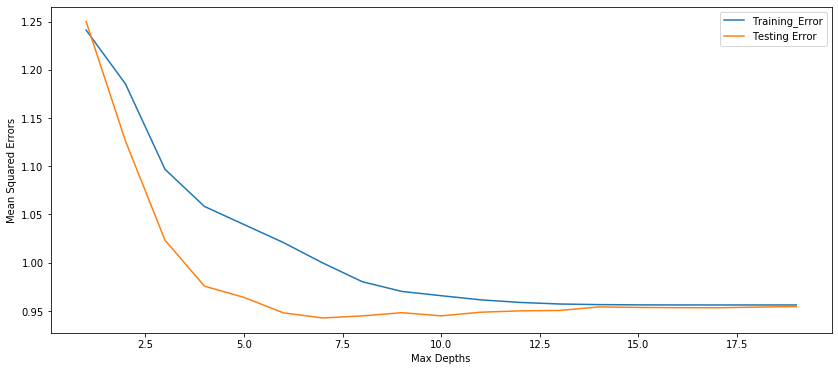

In [15]:
#plotting 

plt.figure(figsize= [14,6])
plt.plot(max_depths, training_error, label= 'Training_Error')
plt.plot(max_depths, testing_error, label = 'Testing Error')
plt.xlabel('Max Depths')
plt.ylabel('Mean Squared Errors')
plt.legend()